<a href="https://colab.research.google.com/github/Ashuto7h/ML-works/blob/main/Copy_of_predict_churn_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

train = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/predict_churn/files/train.csv')
test = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/predict_churn/files/test.csv')

In [ ]:
train.describe()
# print(test.describe())

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## Univariate and Bivariate analysis
#### 1. Customer Id
total 36992 unique values. 

#### 2. Name - This field is not necessary


In [ ]:
del train['Name']
del test['Name']

#### 25. churn_risk_score

In [ ]:
print(train['churn_risk_score'].value_counts())
train['churn_risk_score'].replace(0,3,inplace=True)
train['churn_risk_score'].replace(-1,3,inplace=True)
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64


3    11587
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

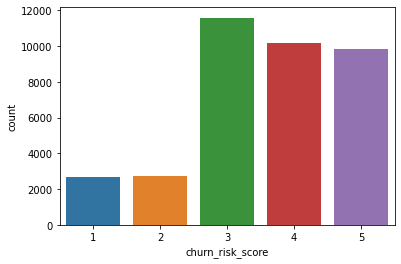

In [ ]:
seaborn.countplot(data = train, x = 'churn_risk_score')

#### 3. age 

In [ ]:
train['age'].replace(0,int(train['age'].mean()),inplace=True)

test['age'].replace(0,int(test['age'].mean()),inplace=True)

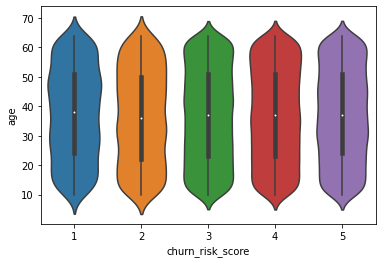

In [ ]:
seaborn.violinplot(data = train, x = 'churn_risk_score', y = 'age')

__Conclusion__ : age doesn't have a major effect on target.

#### 4. Gender

In [ ]:
print(train['gender'].value_counts())
train['gender'].replace('Unknown','F', inplace = True)
print(train['gender'].value_counts())

test['gender'].replace('Unknown','F', inplace = True)

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64
F    18549
M    18443
Name: gender, dtype: int64


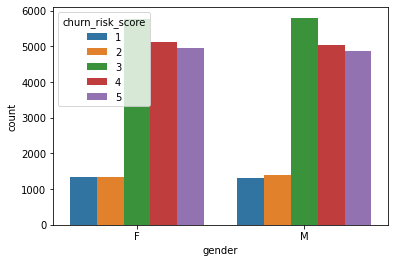

In [ ]:
seaborn.countplot(data=train, x = 'gender', hue = 'churn_risk_score')

__Conclusion__ :  gender doesn't affects the target.

#### 5. security_no -
(Useless) a unique security_no used to identify a person


In [ ]:
del train['security_no']
del test['security_no']

#### 6. region_category


In [ ]:
print(train['region_category'].unique())
print(train['region_category'].value_counts())
print(train['region_category'].isna().sum())
train['region_category'].fillna('Town',inplace = True)
print(train['region_category'].value_counts())

test['region_category'].fillna('Town',inplace = True)

['Village' 'City' 'Town' nan]
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
5428
Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64


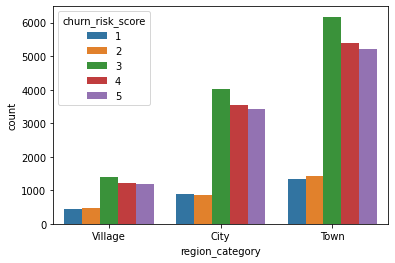

In [ ]:
seaborn.countplot(data = train, x = 'region_category',hue = 'churn_risk_score')

__conclusion__ : region_category affects target.

#### 7. membership_category


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

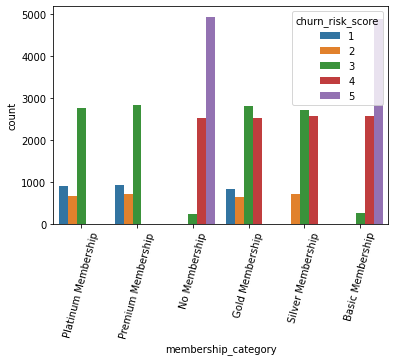

In [ ]:
seaborn.countplot(data = train, x = 'membership_category', hue='churn_risk_score')
pyplot.xticks(rotation= 75)

__conclusion__ : membership_category affects churn risk score.

#### 8. joining_date
1096 unique dates.

from 2015-01-01 to 2017-12-31

not affects much, not required.

In [ ]:
del train['joining_date']
del test['joining_date']

#### 9. joined_through_referral
there are some users who's `joined_through_referral = ?` but they have a unique `referral_id`.


In [ ]:
print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64
Yes    8617
No     8304
?      2998
Name: joined_through_referral, dtype: int64


In [ ]:
train.loc[(train.referral_id == 'xxxxxxxx') & (train.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

train.loc[(train.referral_id != 'xxxxxxxx') & (train.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

test.loc[(test.referral_id == 'xxxxxxxx') & (test.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

test.loc[(test.referral_id != 'xxxxxxxx') & (test.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())


Yes    20592
No     16400
Name: joined_through_referral, dtype: int64
Yes    11305
No      8614
Name: joined_through_referral, dtype: int64


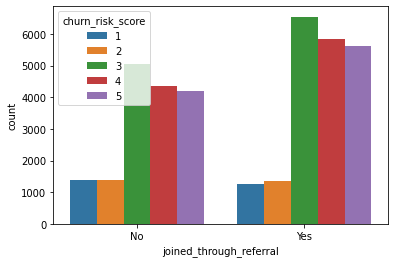

In [ ]:
seaborn.countplot(data =train, x = 'joined_through_referral', hue = 'churn_risk_score')

__conclusion__ : joined_through_referral affects churn_risk_score.

#### 10. referral_id
it doesn't play a major role, because mostly one referral_id is used for only one referral. so it can be removed.


In [ ]:
print('len' ,len(train['referral_id'].unique()))
print(train['referral_id'].value_counts())

del train['referral_id']
del test['referral_id']

len 11359
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID23978        9
            ...  
CID21022        1
CID10289        1
CID8486         1
CID35319        1
CID12643        1
Name: referral_id, Length: 11359, dtype: int64


#### 11. preffered_offer_types

In [ ]:
print(train['preferred_offer_types'].unique())
print(train['preferred_offer_types'].value_counts())
print('nan count  : ',  train['preferred_offer_types'].isna().sum())
print('nan count  : ',  test['preferred_offer_types'].isna().sum())

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
nan count  :  288
nan count  :  159


replacing nan values with 'Gift Vouchers/Coupons'

In [ ]:
train['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(train['preferred_offer_types'].value_counts())

test['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(test['preferred_offer_types'].value_counts())

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
Without Offers              6663
Gift Vouchers/Coupons       6654
Credit/Debit Card Offers    6602
Name: preferred_offer_types, dtype: int64


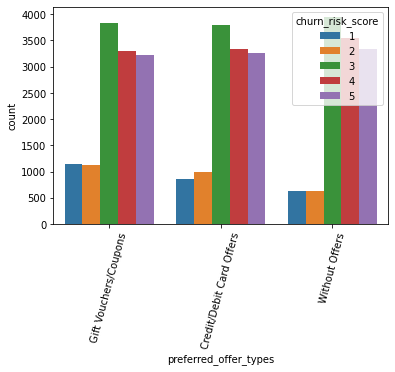

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'preferred_offer_types', hue ='churn_risk_score')

__conclusion__: preferred_offer_types affect target slightly.

#### 12. medium_of_operation

In [ ]:
print(train['medium_of_operation'].unique())
print(train['medium_of_operation'].value_counts())
print()
print(test['medium_of_operation'].value_counts())

['?' 'Desktop' 'Smartphone' 'Both']
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

Desktop       7463
Smartphone    7405
?             2964
Both          2087
Name: medium_of_operation, dtype: int64


replacing all '?' with 'Desktop'

In [ ]:
train['medium_of_operation'].replace('?','Desktop',inplace = True)
print(train['medium_of_operation'].value_counts())

test['medium_of_operation'].replace('?','Desktop',inplace = True)
print(test['medium_of_operation'].value_counts())

Desktop       19306
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
Desktop       10427
Smartphone     7405
Both           2087
Name: medium_of_operation, dtype: int64


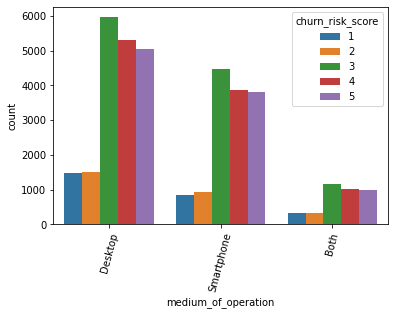

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'medium_of_operation', hue ='churn_risk_score')

__conclusion__ : medium of operation affects churn_risk_score

#### 13. internet_option


In [ ]:
train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

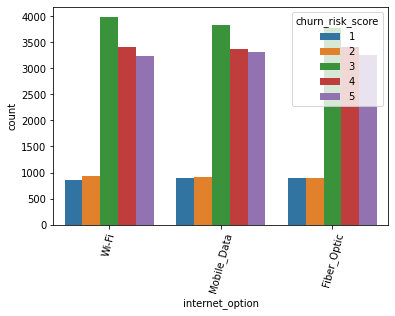

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'internet_option', hue ='churn_risk_score')

__conclusion__ : internet_option affects very slightly over the taget variable

#### 14. last_visit_time - not required

In [ ]:
del train['last_visit_time']
del test['last_visit_time']

#### 15. days_since_last_login

In [ ]:
print(train['days_since_last_login'].unique())

# replacing all negetive values with 0
train.loc[train.days_since_last_login < 0,'days_since_last_login'] = 0
test.loc[test.days_since_last_login < 0,'days_since_last_login'] = 0

train['days_since_last_login'].unique()


[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]


array([17, 16, 14, 11, 20, 23, 10, 19, 15, 13,  0,  5, 12,  9, 21, 18,  1,
       22,  4,  8,  3,  6,  2, 24,  7, 26, 25])

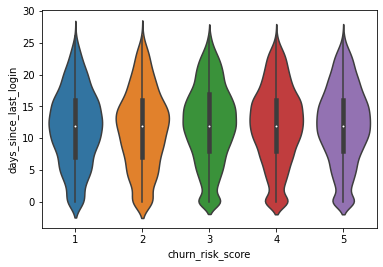

In [ ]:
seaborn.violinplot(data =train, y = 'days_since_last_login',x='churn_risk_score')
pyplot.show()

__conclusion__ : days_since_last_login affects churn_risk_score.

#### 16. avg_time_spent
many values are negetive. replacing them with median

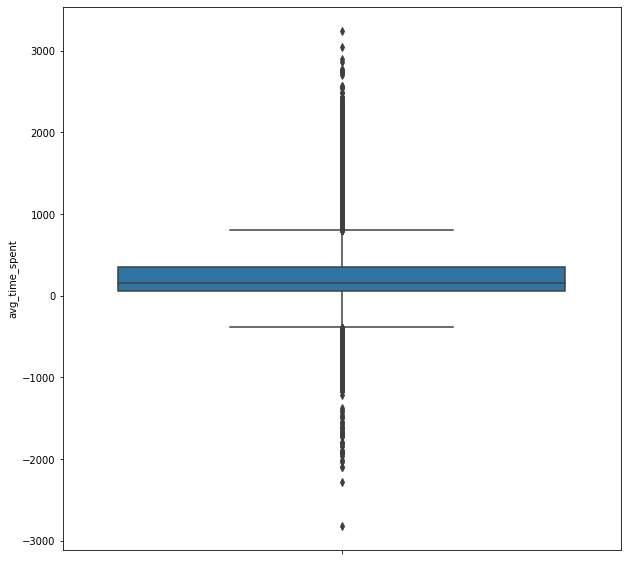

In [ ]:
pyplot.figure(figsize = (10,10))
seaborn.boxplot(data= train, y = 'avg_time_spent',hue ='churn_risk_score')

In [ ]:
# imputing outliers.
import math
train['avg_time_spent'] = abs(train['avg_time_spent'])
q_l = train['avg_time_spent'].quantile(0.25)
q_h = train['avg_time_spent'].quantile(0.75)
q_m = q_h- q_l

med = train['avg_time_spent'].median()
train.loc[(train.avg_time_spent < q_l - 1.5 * q_m) | (train.avg_time_spent > q_h + 1.5 * q_m), 'avg_time_spent'] = med

test.loc[(test.avg_time_spent < q_l - 1.5*q_m) | (test.avg_time_spent > q_h+1.5 *q_m),'avg_time_spent'] = med

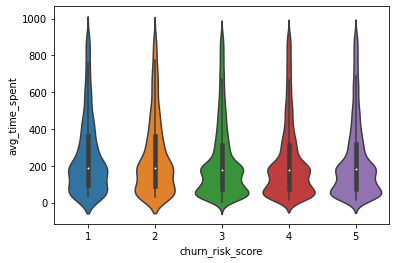

In [ ]:
seaborn.violinplot(data =train, y = 'avg_time_spent',x='churn_risk_score')
pyplot.show()

#### 17. avg_transaction_value
discrete values in range 0 to 99914.05

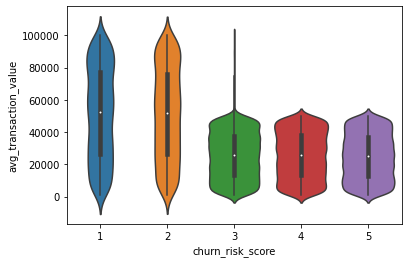

In [ ]:
seaborn.violinplot(data =train, y = 'avg_transaction_value',x='churn_risk_score')
pyplot.show()

#### 18. avg_frequency_login_days

In [ ]:
train['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
-22.01006899965484        1
-2.4356928251083723       1
-3.4977933593510073       1
30.56047806745555         1
-16.77810004297323        1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [ ]:
train.loc[(train.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

train['avg_frequency_login_days'] = train['avg_frequency_login_days'].astype(str).astype(float)

train.loc[train.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

print(train['avg_frequency_login_days'].value_counts())


test.loc[(test.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

test['avg_frequency_login_days'] = test['avg_frequency_login_days'].astype(str).astype(float)

test.loc[test.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

0.000000     4205
13.000000    1394
19.000000    1365
8.000000     1361
14.000000    1355
             ... 
49.461645       1
33.147512       1
53.812360       1
47.535629       1
30.658806       1
Name: avg_frequency_login_days, Length: 971, dtype: int64


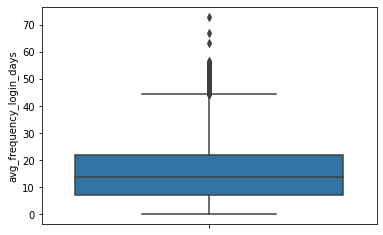

15.0 0        17.0
1        10.0
2        22.0
3         6.0
4        16.0
         ... 
36987     6.0
36988    28.0
36989     0.0
36990    20.0
36991     0.0
Name: avg_frequency_login_days, Length: 36992, dtype: float64


In [ ]:
seaborn.boxplot(data=train, y = 'avg_frequency_login_days')
pyplot.show()

q_l = train['avg_frequency_login_days'].quantile(0.25)
q_h = train['avg_frequency_login_days'].quantile(0.75)
q_m = q_h- q_l
med = train['avg_frequency_login_days']
print(q_m, med)
train.loc[(train.avg_frequency_login_days < q_l - 1.5 * q_m) | (train.avg_frequency_login_days > q_h + 1.5 * q_m), 'avg_frequency_login_days'] = med

test.loc[(test.avg_frequency_login_days < q_l - 1.5 * q_m) | (test.avg_frequency_login_days > q_h + 1.5 * q_m), 'avg_frequency_login_days'] = med

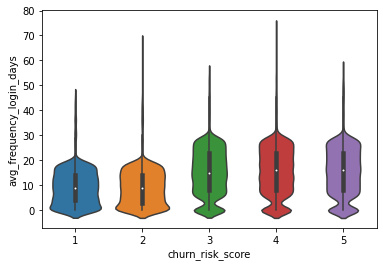

In [ ]:
seaborn.violinplot(data =train, y = 'avg_frequency_login_days',x='churn_risk_score')
pyplot.show()

__conclusion__ : avg_frequency_login_days affects target.

#### 19. points_in_wallet

In [ ]:
print(train['points_in_wallet'].isna().sum())
train['points_in_wallet'].fillna(train['points_in_wallet'].mean(),inplace = True)
print(train['points_in_wallet'].isna().sum())

test['points_in_wallet'].fillna(test['points_in_wallet'].mean(),inplace = True)

3443
0


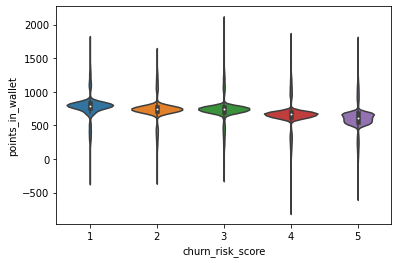

In [ ]:
seaborn.violinplot(data =train, y = 'points_in_wallet',x='churn_risk_score')
pyplot.show()
# print(train)

__conclusion__ : points_in_wallet doesn't affects target.

#### 20. used_special_discount

In [ ]:
print(train['used_special_discount'].value_counts())
train['used_special_discount'].replace(0,'No', inplace = True)
print(train['used_special_discount'].value_counts())

test['used_special_discount'].replace(0,'No', inplace = True)

Yes    20342
No     16650
Name: used_special_discount, dtype: int64
Yes    20342
No     16650
Name: used_special_discount, dtype: int64


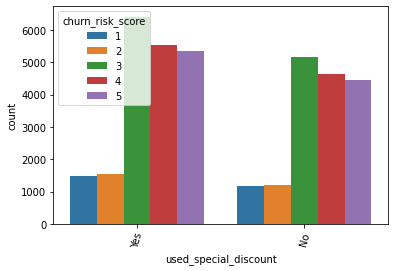

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'used_special_discount', hue ='churn_risk_score')

__conclusion__: used_special_discount affects target slightly

#### 21. offer_application_preference

In [ ]:
print(train['offer_application_preference'].value_counts())
train['offer_application_preference'].replace(0,'No',inplace = True)
print(train['offer_application_preference'].value_counts())

test['offer_application_preference'].replace(0,'No',inplace = True)

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64
Yes    20440
No     16552
Name: offer_application_preference, dtype: int64


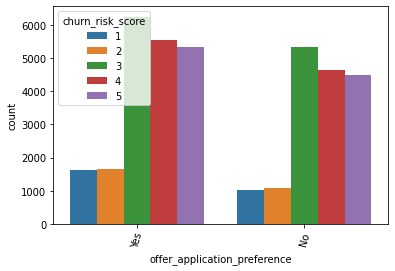

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'offer_application_preference', hue ='churn_risk_score')

__conclusion__ : offer_application_preference affects slightly

#### 22. past_complaint

In [ ]:
print(train['past_complaint'].value_counts())
train['past_complaint'].replace(0,'No',inplace = True)
print(train['past_complaint'].value_counts())

test['past_complaint'].replace(0,'No',inplace = True)

No     18602
Yes    18390
Name: past_complaint, dtype: int64
No     18602
Yes    18390
Name: past_complaint, dtype: int64


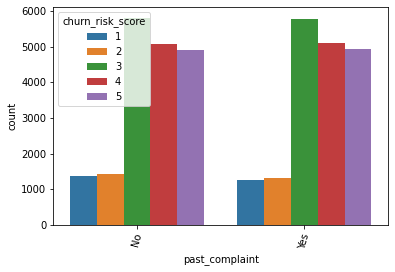

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'past_complaint', hue ='churn_risk_score')

__conclusion__ : past_complaints affect slightly.

#### 23. complaint_status

In [ ]:
print(train['complaint_status'].value_counts())
train['complaint_status'].replace(0,'No Information Available',inplace = True)
print(train['complaint_status'].value_counts())

test['complaint_status'].replace(0,'No Information Available',inplace = True)

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


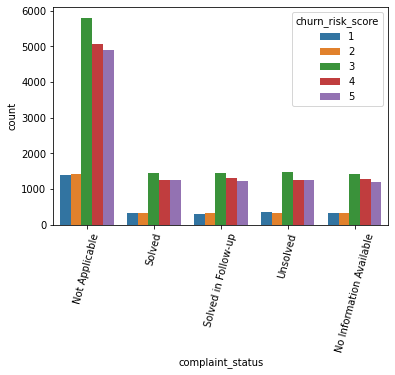

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'complaint_status', hue ='churn_risk_score')

__conclusion__ : complaint_status affects slightly.

#### 24. feedback

In [ ]:
print(train['feedback'].value_counts())
train['feedback'].replace(0,'No reason specified', inplace = True)

test['feedback'].replace(0,'No reason specified', inplace = True)

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


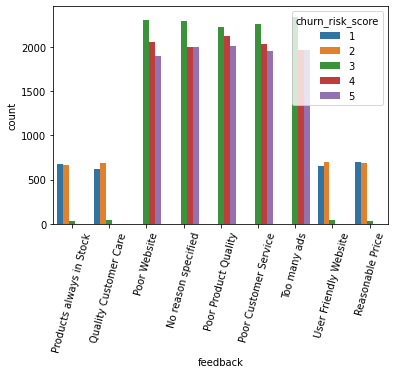

In [ ]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'feedback', hue ='churn_risk_score')

__conclusion__: feedback majorly affects target.

## Other Visualizations
### all Box Plots

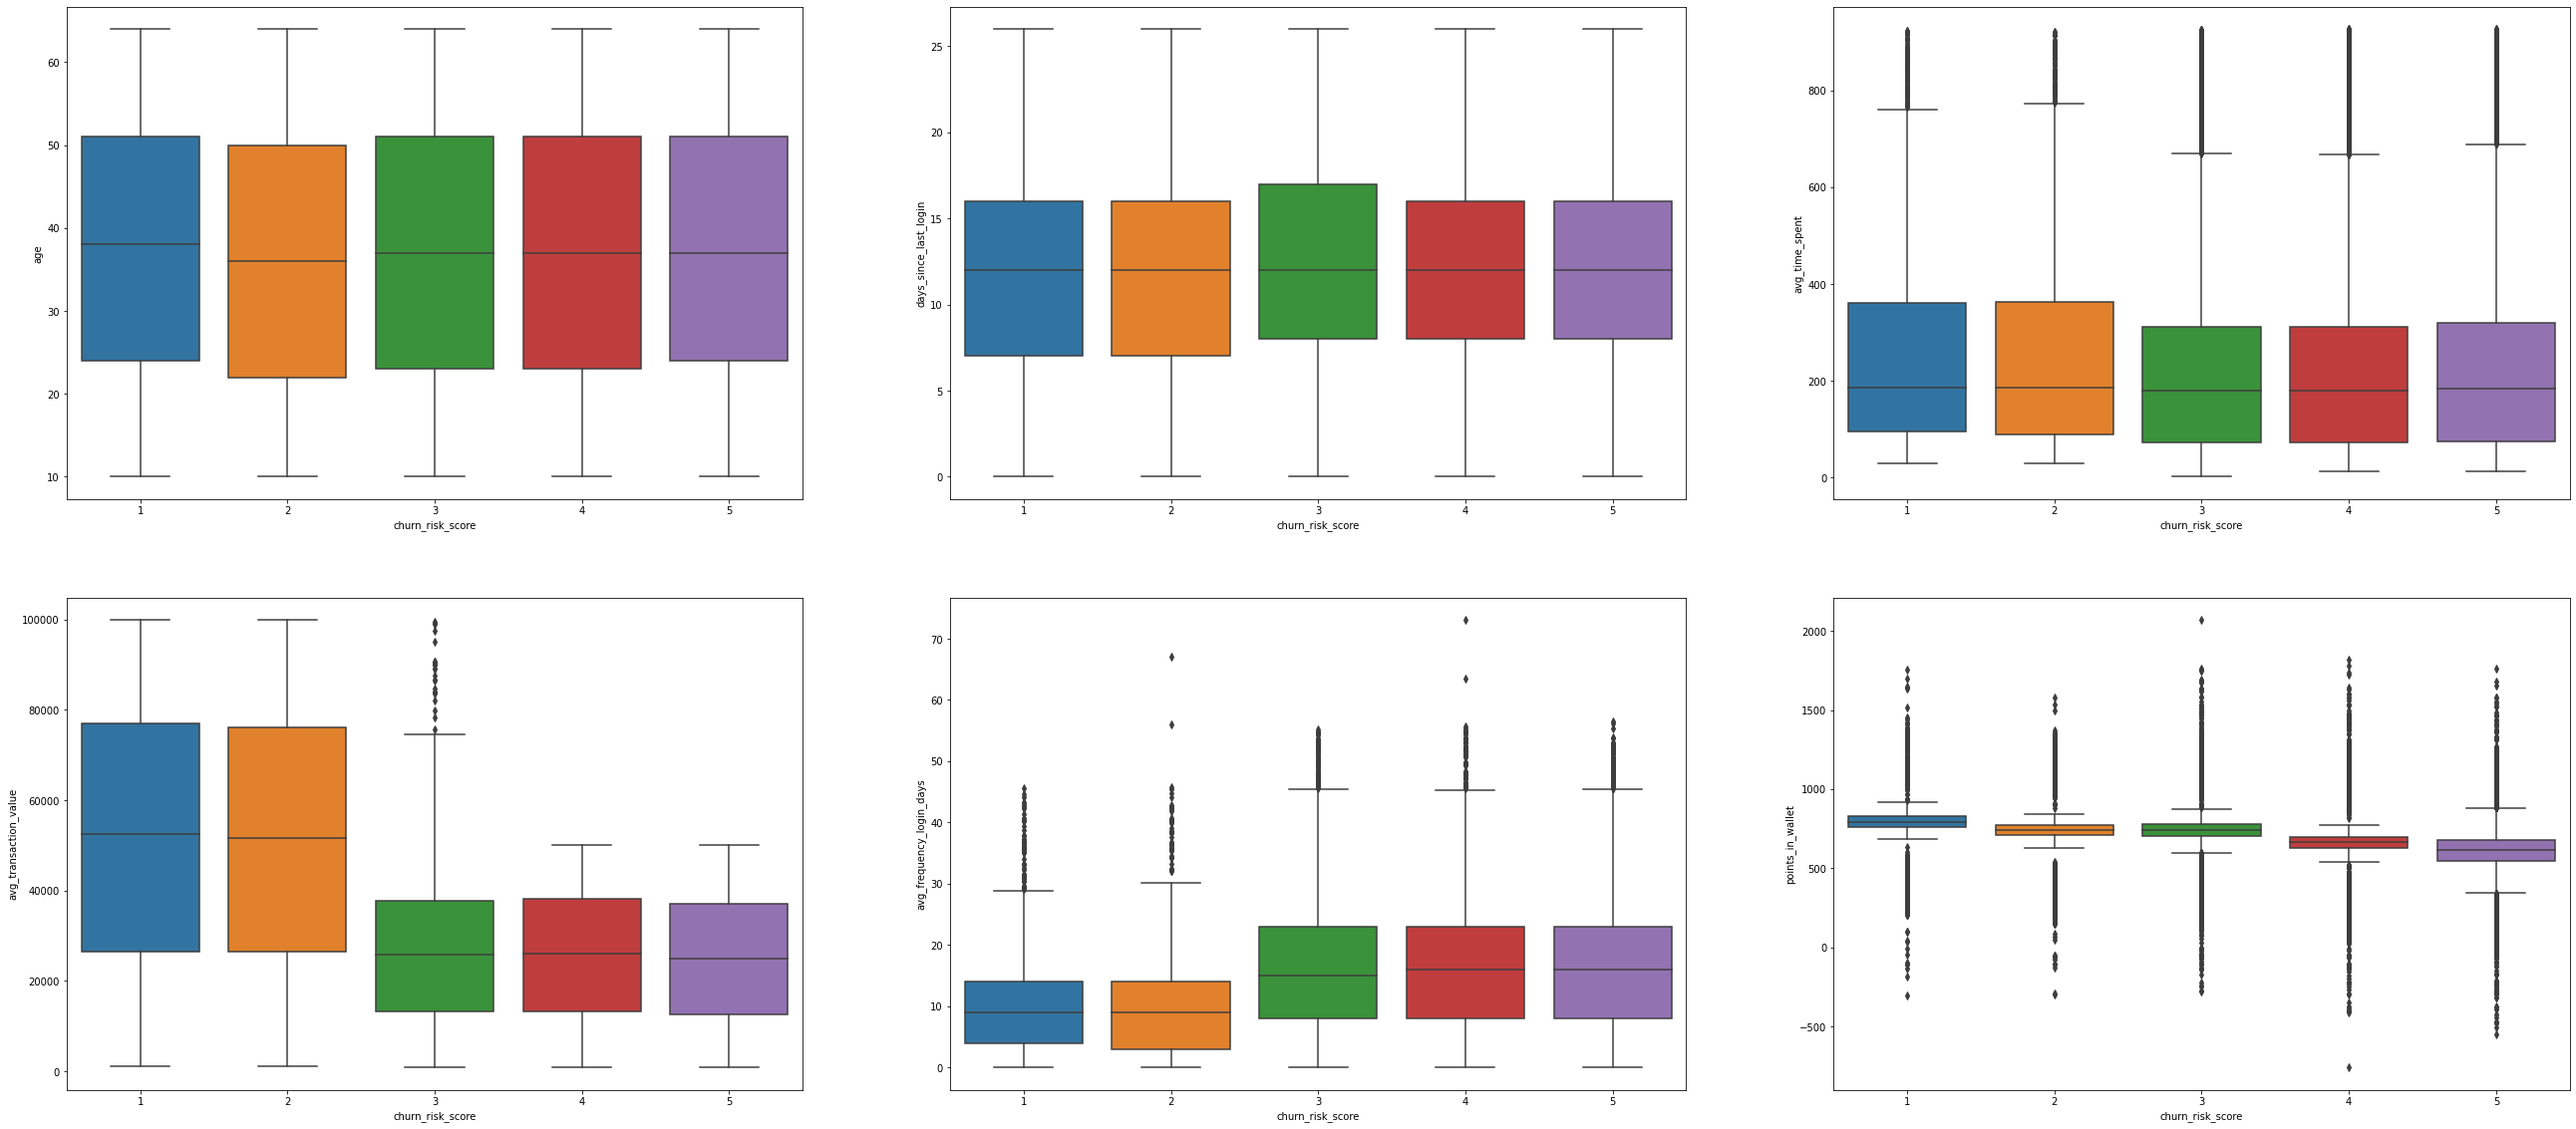

In [ ]:
cols = ['age', 'days_since_last_login',	'avg_time_spent', 'avg_transaction_value','avg_frequency_login_days','points_in_wallet', 'churn_risk_score']
train_numer = pandas.DataFrame(data = train, columns = cols)

names = train_numer.columns;
ncols = len(names)
fig1 = pyplot.figure(figsize = (45,20))
axes = fig1.subplots(2, int(ncols/2))

for name, ax in zip(names, axes.flatten()):
    seaborn.boxplot(y=name, data=train_numer, x = 'churn_risk_score', ax=ax)
    
pyplot.show()

## Encoding Categorical data

In [ ]:
cols = ['gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
      'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']
train_dum = pandas.get_dummies(data = train, columns = cols, drop_first=True)
test_dum = pandas.get_dummies(data = test, columns = cols, drop_first=True)
train_dum

,customer_id,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,18,17,300.630000,53005.25,17.0,781.750000,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,32,16,306.340000,12838.38,10.0,686.882199,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,44,14,516.160000,21027.00,22.0,500.690000,5,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,37,11,53.270000,25239.56,6.0,567.660000,5,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,31,20,113.130000,24483.66,16.0,663.060000,5,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,46,2,650.682759,27277.68,6.0,639.510000,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
36988,fffe43004900440033003500380036003600,29,13,638.123421,11069.71,28.0,527.990000,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
36989,fffe4300490044003500330034003100,23,12,154.940000,38127.56,0.0,680.470000,4,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
36990,fffe43004900440031003200390039003000,53,15,482.610000,2378.86,20.0,197.264414,3,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


## Over Sampling using smote


In [ ]:
y = train_dum['churn_risk_score']
x = train_dum.drop(columns = ['churn_risk_score'])

x.drop(columns =['customer_id'],inplace = True)
valid_cid = test_dum['customer_id']
x_valid = test_dum.drop(columns=['customer_id'])

# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)
# columns = x.columns
# os_data_x, os_data_y = os.fit_sample(x, y)
# x = pandas.DataFrame(data=os_data_x,columns=columns )
# y = pandas.DataFrame(data=os_data_y,columns=['y'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(x))
# print(len(y))

## Normalising dataset

In [ ]:
# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler()
# cols = x.columns
# x = pandas.DataFrame(data = scaler.fit_transform(x),columns = cols)

# x_valid = pandas.DataFrame(data = scaler.transform(x_valid), columns = cols)
# x

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.148148,0.653846,0.322980,0.526717,0.232679,0.545073,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.407407,0.615385,0.329152,0.121456,0.136870,0.511548,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.629630,0.538462,0.555957,0.204074,0.301114,0.445750,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.423077,0.055596,0.246577,0.082122,0.469416,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.388889,0.769231,0.120302,0.238950,0.218992,0.503130,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,0.666667,0.076923,0.701369,0.267140,0.082122,0.494807,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36988,0.351852,0.500000,0.687793,0.103611,0.383236,0.455397,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36989,0.240741,0.461538,0.165496,0.376609,0.000000,0.509282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36990,0.796296,0.576923,0.519691,0.015925,0.273740,0.338522,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recursive Feature Elimination

In [ ]:
# x_cols = x.columns.values.tolist()
# y_cols = ['y_']
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=2000)
# rfe = RFECV(logreg, min_features_to_select = 30,verbose = 1, n_jobs = 1)
# rfe = rfe.fit(x, y.values.ravel())

# for col, support, rank in zip(x, rfe.support_, rfe.ranking_):
#     print(col,support,rank)

In [ ]:
# # x_cols = x.columns[rfe.support_]
# # x_cols

# rfe_cols = ['age', 'days_since_last_login', 'avg_time_spent',
#        'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
#        'region_category_Village', 'membership_category_Gold Membership',
#        'membership_category_No Membership',
#        'membership_category_Platinum Membership',
#        'membership_category_Premium Membership',
#        'membership_category_Silver Membership', 'joined_through_referral_Yes',
#        'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
#        'internet_option_Mobile_Data', 'used_special_discount_Yes',
#        'offer_application_preference_Yes', 'past_complaint_Yes',
#        'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
#        'complaint_status_Unsolved', 'feedback_Poor Customer Service',
#        'feedback_Poor Product Quality', 'feedback_Poor Website',
#        'feedback_Products always in Stock', 'feedback_Quality Customer Care',
#        'feedback_Reasonable Price', 'feedback_Too many ads',
#        'feedback_User Friendly Website']

# x = x[rfe_cols]
# x_valid = x_valid[rfe_cols]
# x

## Backward Elimination

In [ ]:
# y_unit = y.divide(5)
# import statsmodels.api as sm
# print(y.shape,x.shape)
# logit_model = sm.Logit(list(y_unit),x)
# result = logit_model.fit()
# print(result.summary())

In [ ]:
# cols = ['points_in_wallet',
#        'membership_category_Gold Membership',
#        'membership_category_No Membership',
#        'membership_category_Platinum Membership',
#        'membership_category_Premium Membership',
#        'membership_category_Silver Membership',  'past_complaint_Yes',
#        'complaint_status_Not Applicable', 'complaint_status_Solved',
#        'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
#        'feedback_Poor Customer Service', 'feedback_Poor Product Quality',
#        'feedback_Poor Website', 'feedback_Products always in Stock',
#        'feedback_Quality Customer Care', 'feedback_Reasonable Price',
#        'feedback_Too many ads', 'feedback_User Friendly Website']

# x_train = x_train[cols]
# x_valid = x_valid[cols]
# x_test = x_test[cols]
# logit_model = sm.Logit(y_train_unit,x_train)
# result = logit_model.fit()
# print(result.summary())

In [ ]:
# print(x_train.columns)
# print(len(x_train.columns))

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
# print(x_train,x_test,y_train,y_test, end= '\n')
# print(valid_cid,x_valid[:5])

# Building Models
## 1. Logistic Regression

In [ ]:
# for normalized data
# y_train = y_train.ravel()
# y_test = y_test.ravel()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept= True,max_iter = 2000)
logreg.fit(x_train,y_train)

print('\nAccuracy of train: {:.5f}'
     .format(logreg.score(x_train, y_train)))

y_pred = logreg.predict(x_test)
print('\nAccuracy of test: {:.5f}\n'
     .format(logreg.score(x_test, y_test)))


Accuracy of train: 0.69861

Accuracy of test: 0.69536



##2. Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'modified_huber',shuffle = False)
sgd.fit(x_train, y_train)
print('\nAccuracy on training set: {:.5f}'
     .format(sgd.score(x_train, y_train)))
print('\nAccuracy on test set: {:.5f}\n'
     .format(sgd.score(x_test, y_test)))


Accuracy on training set: 0.65715

Accuracy on test set: 0.66009



##3. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.5f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.5f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.61430
Accuracy of GNB classifier on test set: 0.60589


##4. K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('\nAccuracy of K-NN classifier on training set: {:.5f}'
     .format(knn.score(x_train, y_train)))
print('\nAccuracy of K-NN classifier on test set: {:.5f}\n'
     .format(knn.score(x_test, y_test)))


Accuracy of K-NN classifier on training set: 0.72673

Accuracy of K-NN classifier on test set: 0.55089



##5. Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.5f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.5f}'
     .format(lda.score(x_test, y_test)))

Accuracy of LDA classifier on training set: 0.65668
Accuracy of LDA classifier on test set: 0.65914


##6. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.5f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.5f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.70557
Accuracy of SVM classifier on test set: 0.65171


##7. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('\nAccuracy of Decision Tree classifier on training set: {:.5f}'
     .format(clf.score(x_train, y_train)))
print('\nAccuracy of Decision Tree classifier on test set: {:.5f}\n'
     .format(clf.score(x_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00000

Accuracy of Decision Tree classifier on test set: 0.72591



##8. Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train,y_train)
print('\nAccuracy on training set: {:.5f}'
     .format(rfm.score(x_train, y_train)))
print('\nAccuracy on test set: {:.5f}\n'
     .format(rfm.score(x_test, y_test)))


Accuracy on training set: 1.00000

Accuracy on test set: 0.75689



### Neural Network

In [ ]:
y_train_m =y_train.sub(1)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.losses as kloss
# model = Sequential()
# model.add(Dense(19, activation='relu', input_shape =(19,)))
# model.add(Dense(13, activation='relu'))
# model.add(Dense(8, activation ='relu'))
# model.add(Dense(5, activation ='sigmoid'))

# model.compile(loss =kloss.SparseCategoricalCrossentropy(),optimizer='sgd', metrics=['accuracy'])
# re
# model.fit(x_train, y_train_m, epochs= 64, batch_size = 1, verbose = 1)

In [ ]:
# y_test_m = y_test.sub(1)
# score = model.evaluate(x_test,y_test_m, verbose = 1)
# print(score)

# y_pred = model.predict_classes(x_test)
# from sklearn.metrics import classification_report

# # Confusion matrix
# print(classification_report(y_test_m, y_pred))

# Conclusion
Random Forest has high accurarcy over training and test set.


In [ ]:
y_valid = rfm.predict(x_valid)
y_valid

array([3, 3, 3, ..., 5, 4, 3])

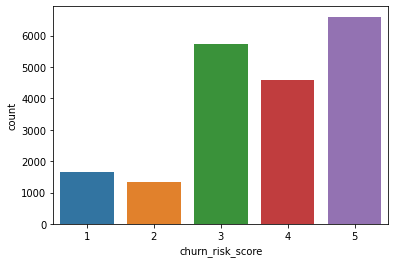

In [ ]:
y_valid = pandas.DataFrame(data = y_valid, columns=['churn_risk_score'])
seaborn.countplot(data = y_valid, x= 'churn_risk_score')

In [ ]:
submission = pandas.concat([valid_cid,y_valid],axis = 1)
submission

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,5
19917,fffe43004900440034003200330033003600,4


In [ ]:
submission.to_csv('submission.csv',index=False)

# Cases
## outlier remove
- linear regression : 39.75, 39.20
- gradient descendent : 36.78, 35.43
- gaussian naive bayes : 62.85, 61.10
- knn : 66.14, 50.45
- lda : 65.90, 64.98
- svm : 34.87, 34.46
- decision tree : 100, 72.88
- random forest : 100, 75.66
- final : 76.11290

## + normalize
- linear regression : 69.53, 68.58
- gradient descendent : 60.51, 59.39
- gaussian naive bayes : 61.17, 61.57
- knn : 72.90, 55.16
- lda : 65.51, 64.72
- svm : 70.52, 64.99
- decision tree : 100, 72.81
- random forest : 100, 75.82
- final - 21.76

## + rfecv
- linear regression : 69.63, 68.79
- gradient descendent : 60.14, 59.11
- gaussian naive bayes : 61.18, 61.58
- knn : 74.46, 59.99
- lda : 65.56, 64.55
- svm : 69.28, 64.98
- decision tree : 100, 72.55
- random forest : 100, 76.02
- final - 21.70
 
## - backward elimination
## + over sampling


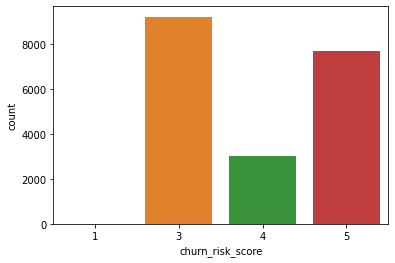

In [ ]:
rfm = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
rfm.fit(x_train,y_train)
y_valid = rfm.predict(x_valid)
y_valid
y_valid = pandas.DataFrame(data = y_valid, columns=['churn_risk_score'])
seaborn.countplot(data = y_valid, x= 'churn_risk_score')
submission = pandas.concat([valid_cid,y_valid],axis = 1)
submission
submission.to_csv('submission.csv',index=False)

In [ ]:
# {"max_features": [1,3,10],
#                 "min_samples_split":[2,3,10],
#                 "min_samples_leaf":[1,3,10],
#                 "bootstrap":[False],
#                 "n_estimators":[100,300],
#                 "criterion":["gini"]}

parameters = {'n_estimators' : list(range(10,300,10)),
              'criterion' : ['gini', 'entropy'],
              'min_samples_split' : list(range(2,20)),
              'min_samples_leaf' : list(range(1,20)),
              'max_features' :['auto','sqrt','log2',None],
              'max_leaf_nodes' :list(range(1,20)),
              'bootstrap' :[True,False],
              'oob_score' : [True,False],
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
clf = RandomizedSearchCV(RandomForestClassifier(random_state = 42),
                    param_distributions= parameters,
                    cv = StratifiedKFold(n_splits = 5),
                    scoring = "accuracy",
                    n_jobs = -1, verbose = 2)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)
# accuracy.append(clf.best_score_ * 100)
print()
print('best_estimator :', clf.best_estimator_)

print('train report : \n',classification_report(y_train, y_train_pred))
print('test_report : \n',classification_report(y_test,y_pred))
print("---------------------------------------------------------------------------")
# 71 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished



best_estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
train report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.00      2015
           2       0.00      0.00      0.00      2042
           3       0.59      0.87      0.70      8683
           4       0.74      0.39      0.51      7665
           5       0.65      0.96      0.78      7339

    accuracy                           0.63     27744
   macro avg       0.45      0.44      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
